# Set you GeoIP.dat here

In [27]:
from collections import Counter

import pandas as pd
import geoip2.database
import seaborn as sns
from matplotlib import pyplot


city_reader = geoip2.database.Reader('/usr/local/var/GeoIP/GeoIP2-City.mmdb')
isp_reader = geoip2.database.Reader('/usr/local/var/GeoIP/GeoIP2-ISP.mmdb')

# List your IPs here

In [5]:
with open('/tmp/ips') as f:
    ips = [x.strip().replace('\"','') for x in f]

# Distinct IP Count

In [6]:
len(set([ip for ip in ips]))

4201

# See Results

In [44]:
countries = []
cities = []
isps = []

for ip in ips:
    city = city_reader.city(ip)
    isp = isp_reader.isp(ip).isp
    
    countries.append(city.country.name)
    cities.append(city.city.name)
    isps.append(isp)

In [62]:
ip_info = pd.DataFrame({'country':countries, 'isp':isps, 'city':cities, 'ip':ips})

In [63]:
ip_info.groupby('country')['country'].count().reset_index(name='count').sort_values(['count'], ascending=False) 

,country,count
7,United States,1791
2,Germany,921
3,India,500
1,France,303
6,United Kingdom,284
4,Republic of Korea,160
0,China,140
5,Singapore,102


In [57]:
ip_info.groupby('city')['city'].count().reset_index(name='count').sort_values(['count'], ascending=False)

,city,count
12,San Jose,770
15,Thousand Oaks,313
10,Paris,275
17,Wilmington,221
7,London,170
13,Seoul,157
1,El Segundo,110
5,Jinan,108
14,Singapore,100
8,Los Angeles,72


# Count Plot

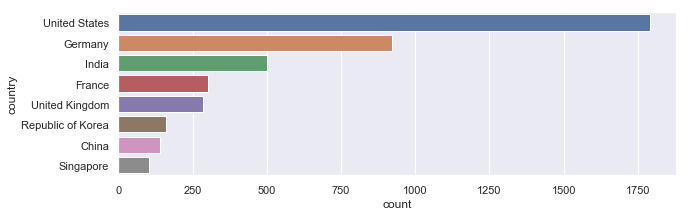

In [64]:
fig, ax = pyplot.subplots(figsize=(10, 3))
sns.set(style="darkgrid")
ax = sns.countplot(y="country", 
                   data=ip_info,
                   orient='h',
                   order = ip_info['country'].value_counts().index)

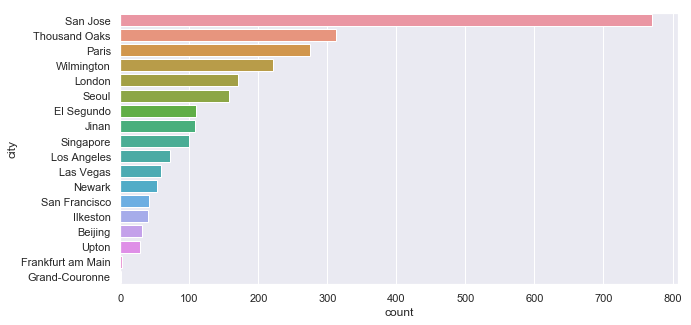

In [65]:
fig, ax = pyplot.subplots(figsize=(10, 5))
sns.set(style="darkgrid")
ax = sns.countplot(y="city", 
                   data=ip_info,
                   orient='h',
                   order = ip_info['city'].value_counts().index)

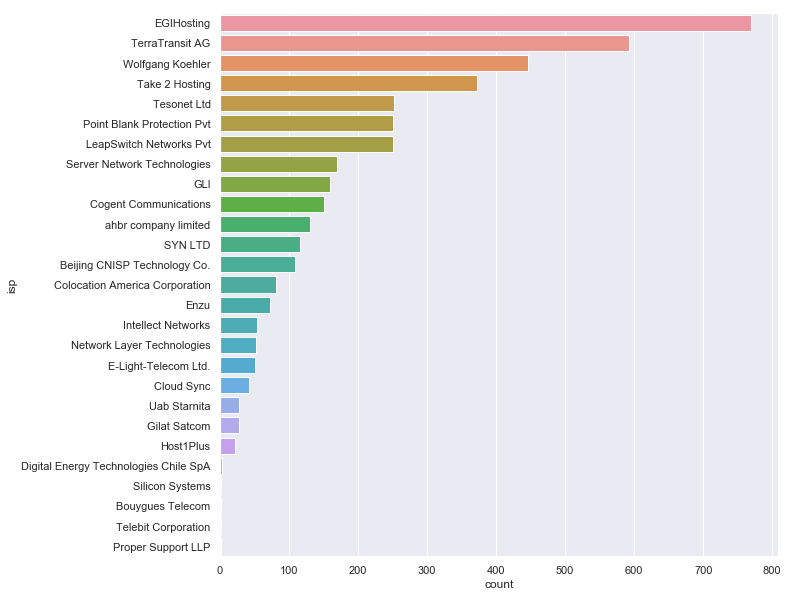

In [67]:
fig, ax = pyplot.subplots(figsize=(10, 10))
sns.set(style="darkgrid")
ax = sns.countplot(y="isp", 
                   data=ip_info,
                   orient='h',
                   order = ip_info['isp'].value_counts().index)

# Just playing around below

In [ ]:
isp = isp_reader.isp('107.165.138.52')

TypeError: unsupported operand type(s) for /: 'str' and 'float'

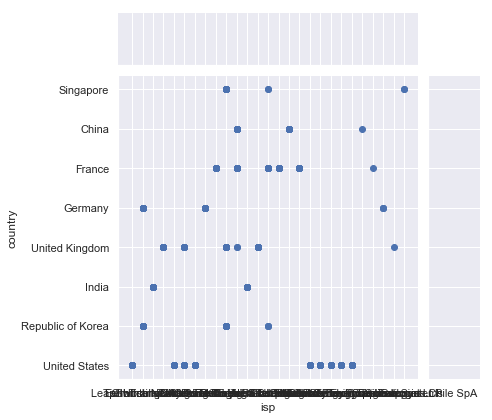

In [77]:
sns.jointplot(x='isp', y='country', data=ip_info)

TypeError: The anonymous_ip method cannot be used with the GeoIP2-ISP database